<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b>Import Necessary Library</b></h1>

In [1]:
import numpy as np
import pandas as pd
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# !pip install interpret
# from interpret.blackbox import LimeTabular
# from interpret import show

import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import graphviz
import shap

import pickle

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b>Dataset Loading</b></h1>

## 1. Load Dataset

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input/ids-intrusion-csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ids-intrusion-csv/02-28-2018.csv
/kaggle/input/ids-intrusion-csv/03-01-2018.csv
/kaggle/input/ids-intrusion-csv/02-16-2018.csv
/kaggle/input/ids-intrusion-csv/02-15-2018.csv
/kaggle/input/ids-intrusion-csv/02-21-2018.csv
/kaggle/input/ids-intrusion-csv/03-02-2018.csv
/kaggle/input/ids-intrusion-csv/02-22-2018.csv
/kaggle/input/ids-intrusion-csv/02-20-2018.csv
/kaggle/input/ids-intrusion-csv/02-14-2018.csv
/kaggle/input/ids-intrusion-csv/02-23-2018.csv


In [3]:
%%time
network_data_d1 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-14-2018.csv", low_memory=False)
network_data_d2 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-15-2018.csv", low_memory=False)
network_data_d3 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-16-2018.csv", low_memory=False)
network_data_d4 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-20-2018.csv", low_memory=False)
network_data_d5 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-21-2018.csv", low_memory=False)
network_data_d6 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-22-2018.csv", low_memory=False)
network_data_d7 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-23-2018.csv", low_memory=False)
network_data_d8 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-28-2018.csv", low_memory=False)
network_data_d9 = pd.read_csv("/kaggle/input/ids-intrusion-csv/03-01-2018.csv", low_memory=False)
network_data_d10 = pd.read_csv("/kaggle/input/ids-intrusion-csv/03-02-2018.csv", low_memory=False)

CPU times: user 4min 21s, sys: 40.7 s, total: 5min 2s
Wall time: 6min 20s


## 2. Remove ['Flow ID', 'Src IP', 'Src Port', 'Dst IP'] Columns from network_data_d4 DataFrame

In [4]:
network_data_d4.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1,inplace=True)

## 3. Data Type Fix

In [5]:
def fixDataType(df_dataset):
    
    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port']
    
    df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
    df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
    df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int)
    df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int)
    df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int)
    df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int)
    df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int)
    df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int)
    df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int)
    df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float)
    df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float)
    df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int)
    df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int)
    df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float)
    df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float)
    df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float)
    df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float)
    df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float)
    df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float)
    df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int)
    df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int)
    df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int)
    df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float)
    df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float)
    df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int)
    df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int)
    df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int)
    df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float)
    df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float)
    df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int)
    df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int)
    df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int)
    df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int)
    df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int)
    df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int)
    df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int)
    df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int)
    df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float)
    df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float)
    df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int)
    df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int)
    df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float)
    df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float)
    df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float)
    df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int)
    df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int)
    df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int)
    df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int)
    df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int)
    df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int)
    df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int)
    df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int)
    df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int)
    df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float)
    df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float)
    df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float)
    df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int)
    df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int)
    df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int)
    df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int)
    df_dataset['Bwd Pkts/b Avg'] = df_dataset['Bwd Pkts/b Avg'].astype(int)
    df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int)
    df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int)
    df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int)
    df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int)
    df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int)
    df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int)
    df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int)
    df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int)
    df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int)
    df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float)
    df_dataset['Active Std'] = df_dataset['Active Std'].astype(float)
    df_dataset['Active Max'] = df_dataset['Active Max'].astype(int)
    df_dataset['Active Min'] = df_dataset['Active Min'].astype(int)
    df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float)
    df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float)
    df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int)
    df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int)
    
    return df_dataset

In [6]:
network_data_d1 = fixDataType(network_data_d1)
network_data_d2 = fixDataType(network_data_d2)
network_data_d3 = fixDataType(network_data_d3)
network_data_d4 = fixDataType(network_data_d4)
network_data_d5 = fixDataType(network_data_d5)
network_data_d6 = fixDataType(network_data_d6)
network_data_d7 = fixDataType(network_data_d7)
network_data_d8 = fixDataType(network_data_d8)
network_data_d9 = fixDataType(network_data_d9)
network_data_d10 = fixDataType(network_data_d10)

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b>Data Understanding</b></h1>

## 1. Data Properties

In [7]:
def dataProperties(df, day):
    print(day)
    df.shape
    print(df)
    print(df.info())
    print("========================")

In [8]:
dataProperties(network_data_d1, "Day 1")
dataProperties(network_data_d2, "Day 2")
dataProperties(network_data_d3, "Day 3")
dataProperties(network_data_d4, "Day 4")
dataProperties(network_data_d5, "Day 5")
dataProperties(network_data_d6, "Day 6")
dataProperties(network_data_d7, "Day 7")
dataProperties(network_data_d8, "Day 8")
dataProperties(network_data_d9, "Day 9")
dataProperties(network_data_d10, "Day 10")

Day 1
         Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  14/02/2018 08:31:01      112641719             3   
1               0         0  14/02/2018 08:33:50      112641466             3   
2               0         0  14/02/2018 08:36:39      112638623             3   
3              22         6  14/02/2018 08:40:13        6453966            15   
4              22         6  14/02/2018 08:40:23        8804066            14   
...           ...       ...                  ...            ...           ...   
1048570        80         6  14/02/2018 10:53:23       10156986             5   
1048571        80         6  14/02/2018 10:53:33            117             2   
1048572        80         6  14/02/2018 10:53:28        5095331             3   
1048573        80         6  14/02/2018 10:53:28        5235511             3   
1048574       443         6  14/02/2018 10:53:28        5807256             6   

         Tot Bwd Pkts

## 2. Data Visualizations

In [9]:
def visualizeBar(df):
    # bar chart of packets label
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=df['Label'].unique(), height=df['Label'].value_counts())
    p = plt.gcf()

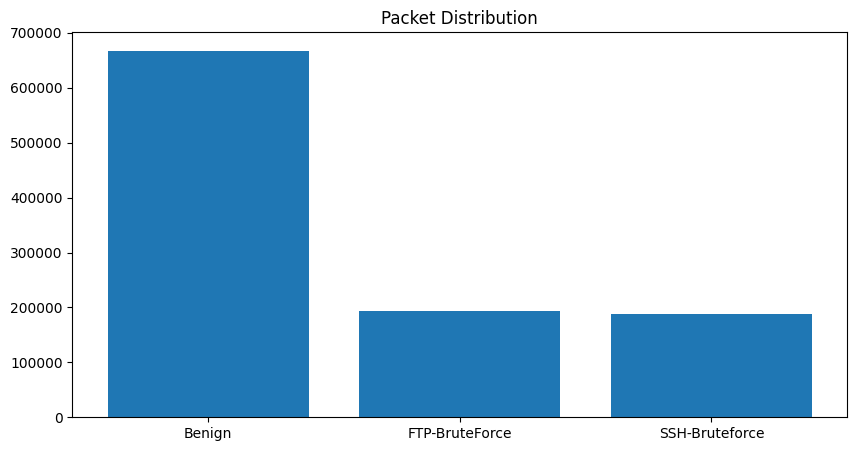

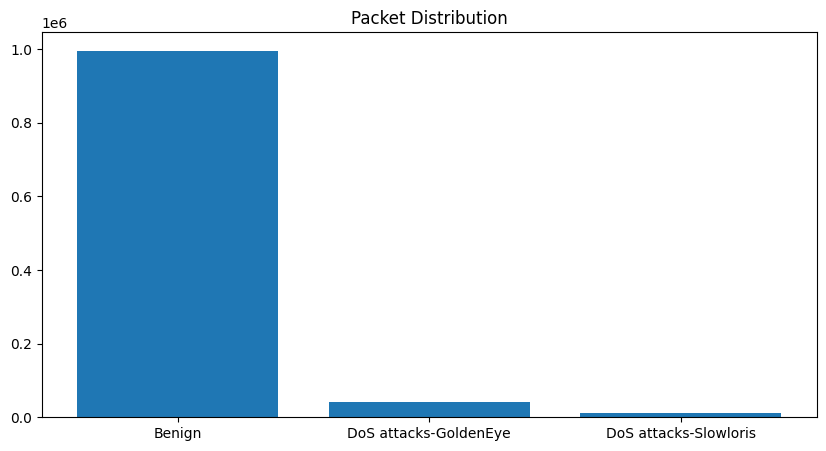

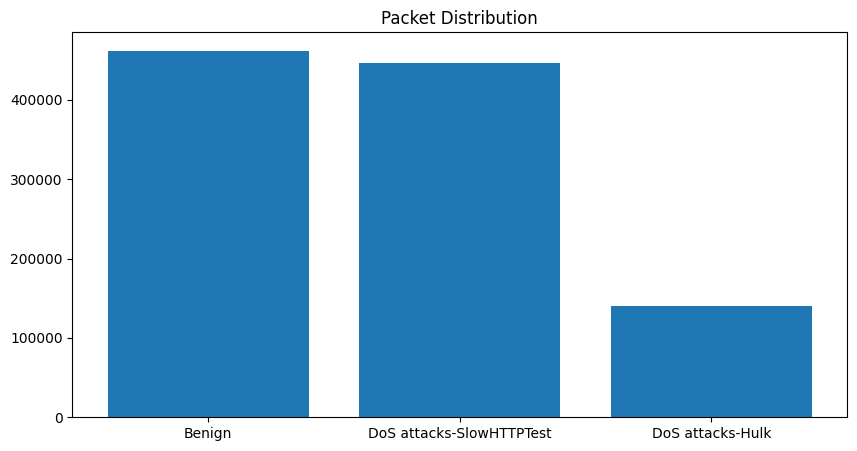

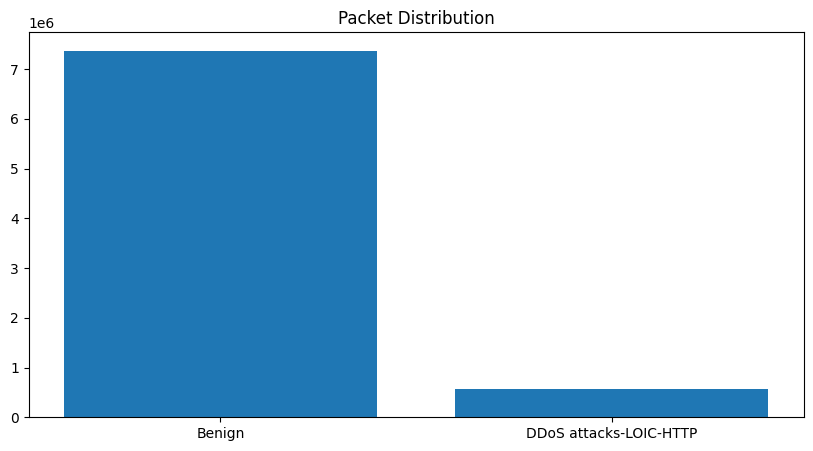

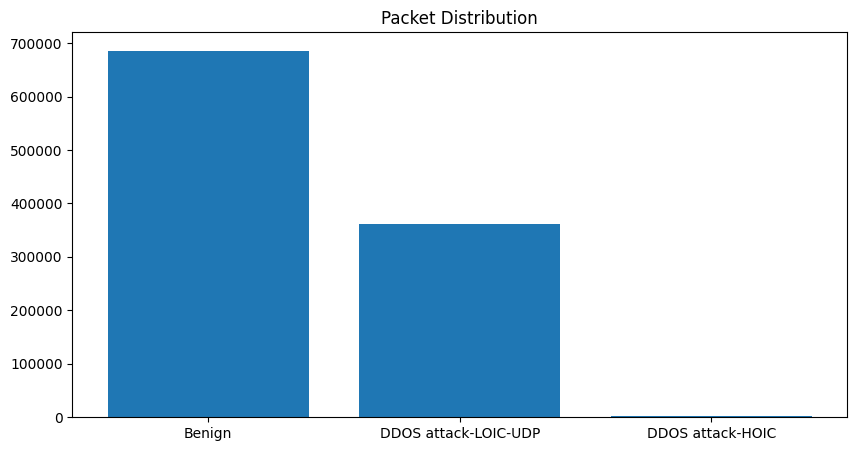

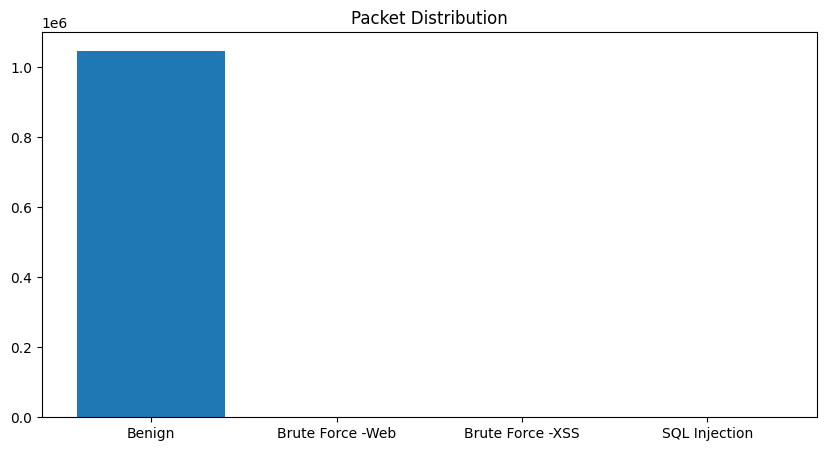

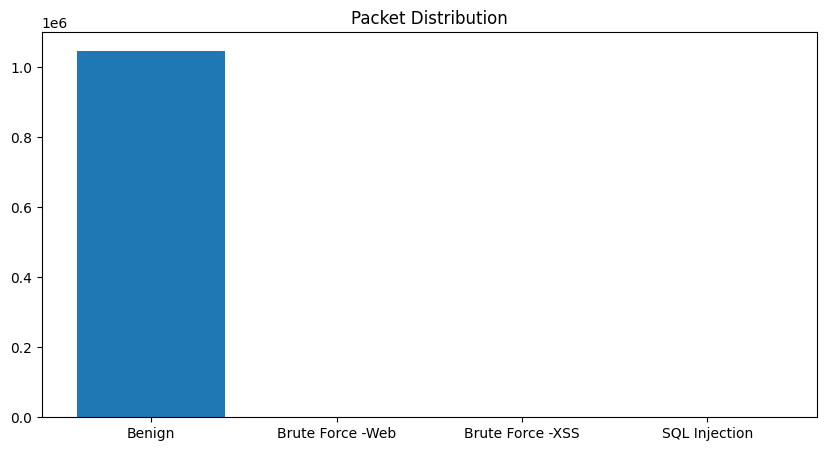

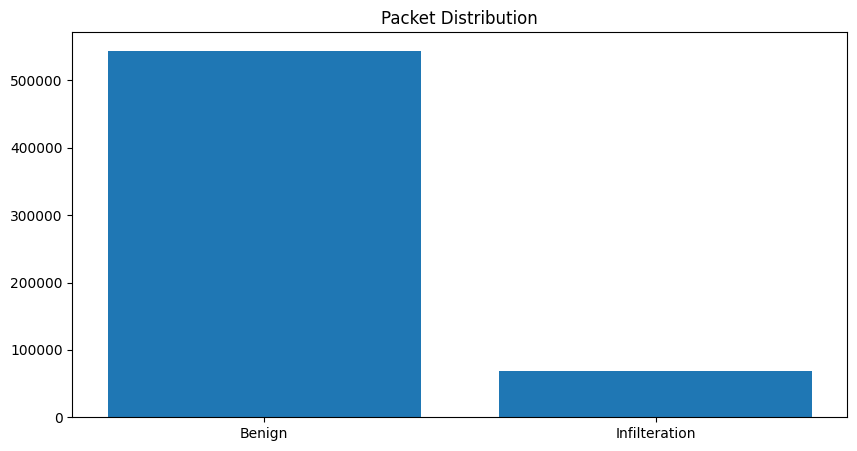

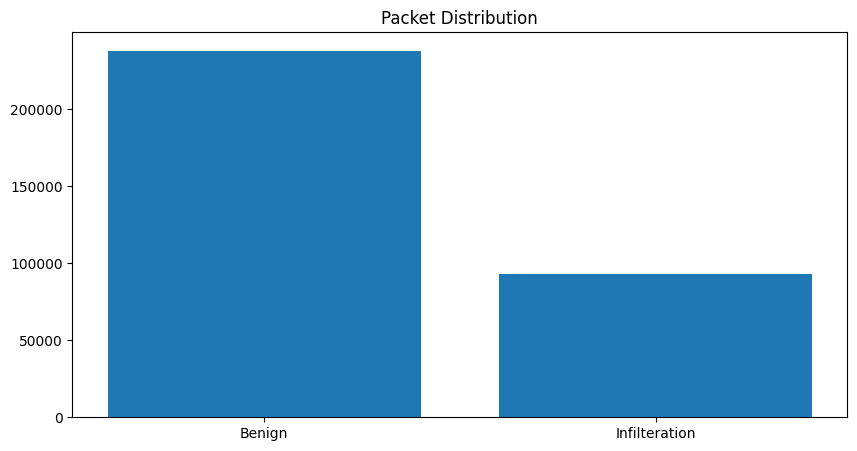

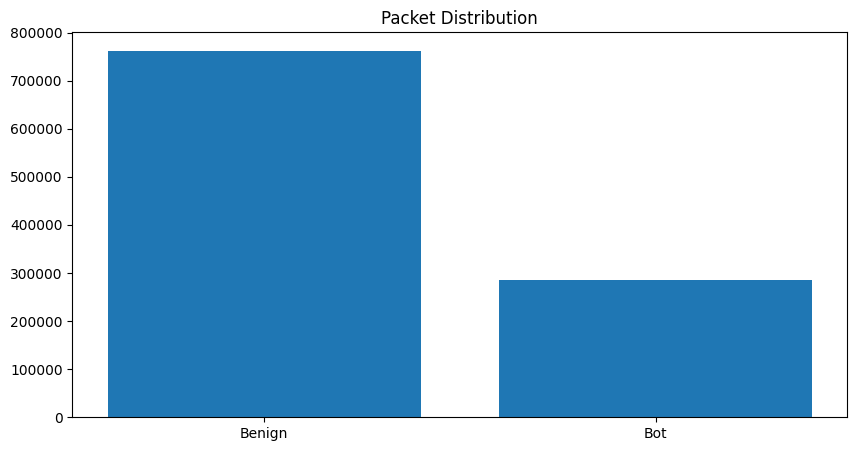

In [10]:
visualizeBar(network_data_d1)
visualizeBar(network_data_d2)
visualizeBar(network_data_d3)
visualizeBar(network_data_d4)
visualizeBar(network_data_d5)
visualizeBar(network_data_d6)
visualizeBar(network_data_d7)
visualizeBar(network_data_d8)
visualizeBar(network_data_d9)
visualizeBar(network_data_d10)

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b>Data Preprocessing</b></h1>

### 1. Drop Infinate and Null

In [11]:
def dropInfinateNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)
    
    return df

In [12]:
network_data_d1 = dropInfinateNull(network_data_d1)
network_data_d2 = dropInfinateNull(network_data_d2)
network_data_d3 = dropInfinateNull(network_data_d3)
network_data_d4 = dropInfinateNull(network_data_d4)
network_data_d5 = dropInfinateNull(network_data_d5)
network_data_d6 = dropInfinateNull(network_data_d6)
network_data_d7 = dropInfinateNull(network_data_d7)
network_data_d8 = dropInfinateNull(network_data_d8)
network_data_d9 = dropInfinateNull(network_data_d9)
network_data_d10 = dropInfinateNull(network_data_d10)

(1048575, 80)
(1044751, 80)
(1048575, 80)
(1040548, 80)
(1048574, 80)
(1048574, 80)
(7948748, 80)
(7889295, 80)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(1042965, 80)
(1048575, 80)
(1042867, 80)
(613071, 80)
(606902, 80)
(331100, 80)
(328181, 80)
(1048575, 80)
(1044525, 80)


### 2. Drop Unnecessary Column

In [13]:
def dropUnnecessaryColumn(df): 
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

In [14]:
network_data_d1 = dropUnnecessaryColumn(network_data_d1)
network_data_d2 = dropUnnecessaryColumn(network_data_d2)
network_data_d3 = dropUnnecessaryColumn(network_data_d3)
network_data_d4 = dropUnnecessaryColumn(network_data_d4)
network_data_d5 = dropUnnecessaryColumn(network_data_d5)
network_data_d6 = dropUnnecessaryColumn(network_data_d6)
network_data_d7 = dropUnnecessaryColumn(network_data_d7)
network_data_d8 = dropUnnecessaryColumn(network_data_d8)
network_data_d9 = dropUnnecessaryColumn(network_data_d9)
network_data_d10 = dropUnnecessaryColumn(network_data_d10)

(1044751, 79)
(1040548, 79)
(1048574, 79)
(7889295, 79)
(1048575, 79)
(1042965, 79)
(1042867, 79)
(606902, 79)
(328181, 79)
(1044525, 79)


## 3. Data Concatenation

In [15]:
network_data = pd.concat([network_data_d1, network_data_d2], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d1, network_data_d2

network_data = pd.concat([network_data, network_data_d3], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d3

network_data = pd.concat([network_data, network_data_d4], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d4

network_data = pd.concat([network_data, network_data_d5], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d5

network_data = pd.concat([network_data, network_data_d6], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d6

network_data = pd.concat([network_data, network_data_d7], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d7

network_data = pd.concat([network_data, network_data_d8], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d8

network_data = pd.concat([network_data, network_data_d9], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d9

network_data = pd.concat([network_data, network_data_d10], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d10

In [17]:
print(network_data['Label'].value_counts())

Benign                      13390249
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193354
SSH-Bruteforce                187589
Infilteration                 160639
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Name: Label, dtype: int64


## 4. Data Ballance

In [18]:
# Sample 40,000 records for each label
sampled_data = network_data.groupby('Label').apply(lambda x: x.sample(n=min(10500, len(x)), random_state=1))

# Reset the index of the sampled data
sampled_data = sampled_data.reset_index(drop=True)
print(f"Total records in the sampled dataset: {len(sampled_data)}")

network_data = sampled_data

Total records in the sampled dataset: 118158


In [19]:
print(network_data['Label'].value_counts())

Benign                      10500
Bot                         10500
DDOS attack-HOIC            10500
DDoS attacks-LOIC-HTTP      10500
DoS attacks-GoldenEye       10500
DoS attacks-Hulk            10500
DoS attacks-SlowHTTPTest    10500
DoS attacks-Slowloris       10500
FTP-BruteForce              10500
Infilteration               10500
SSH-Bruteforce              10500
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: Label, dtype: int64


## 5. Dro

In [20]:
# Assuming network_data is your original DataFrame
# Define the labels to be dropped
labels_to_drop = [
    "DDOS attack-LOIC-UDP",
    "Brute Force -Web",
    "Brute Force -XSS",
    "SQL Injection"
]

# Drop records where "Label" is in labels_to_drop
network_data = network_data[~network_data['Label'].isin(labels_to_drop)]

In [32]:
print(network_data['Label'].value_counts())

0     10500
1     10500
2     10500
3     10500
4     10500
5     10500
6     10500
7     10500
8     10500
9     10500
10    10500
Name: Label, dtype: int64


## 8. Drop Constant Column

In [22]:
# drop the constant columns (which varience is 0)
variances = network_data.var(numeric_only=True)
constant_columns = variances[variances == 0].index
network_data = network_data.drop(constant_columns, axis=1)

print(constant_columns)
print (network_data.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(115500, 71)


## 9. Check and Drop Duplicate Column

In [24]:
duplicates = set()
for i in range(0, len(network_data.columns)):
    col1 = network_data.columns[i]
    for j in range(i+1, len(network_data.columns)):
        col2 = network_data.columns[j]
        if(network_data[col1].equals(network_data[col2])):
            duplicates.add(col2)

print (duplicates)
network_data.drop(duplicates, axis=1, inplace=True)
print (network_data.shape)

{'Subflow Fwd Pkts', 'ECE Flag Cnt', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'CWE Flag Count', 'Subflow Bwd Byts', 'SYN Flag Cnt'}
(115500, 64)


## 10. Encode Target Label

In [25]:
# encode the target feature
label_encoder = LabelEncoder()

network_data['Label'] = label_encoder.fit_transform(network_data['Label'])
attack_types = label_encoder.classes_
attack_encodings = label_encoder.transform(attack_types)

attack_mapping = dict(zip(attack_types, attack_encodings))

for attack, encoding in attack_mapping.items():
    print(f"{attack}: {encoding}")

Benign: 0
Bot: 1
DDOS attack-HOIC: 2
DDoS attacks-LOIC-HTTP: 3
DoS attacks-GoldenEye: 4
DoS attacks-Hulk: 5
DoS attacks-SlowHTTPTest: 6
DoS attacks-Slowloris: 7
FTP-BruteForce: 8
Infilteration: 9
SSH-Bruteforce: 10


## 11. Drop Column Based on Correlations

### a) correlation heatmap

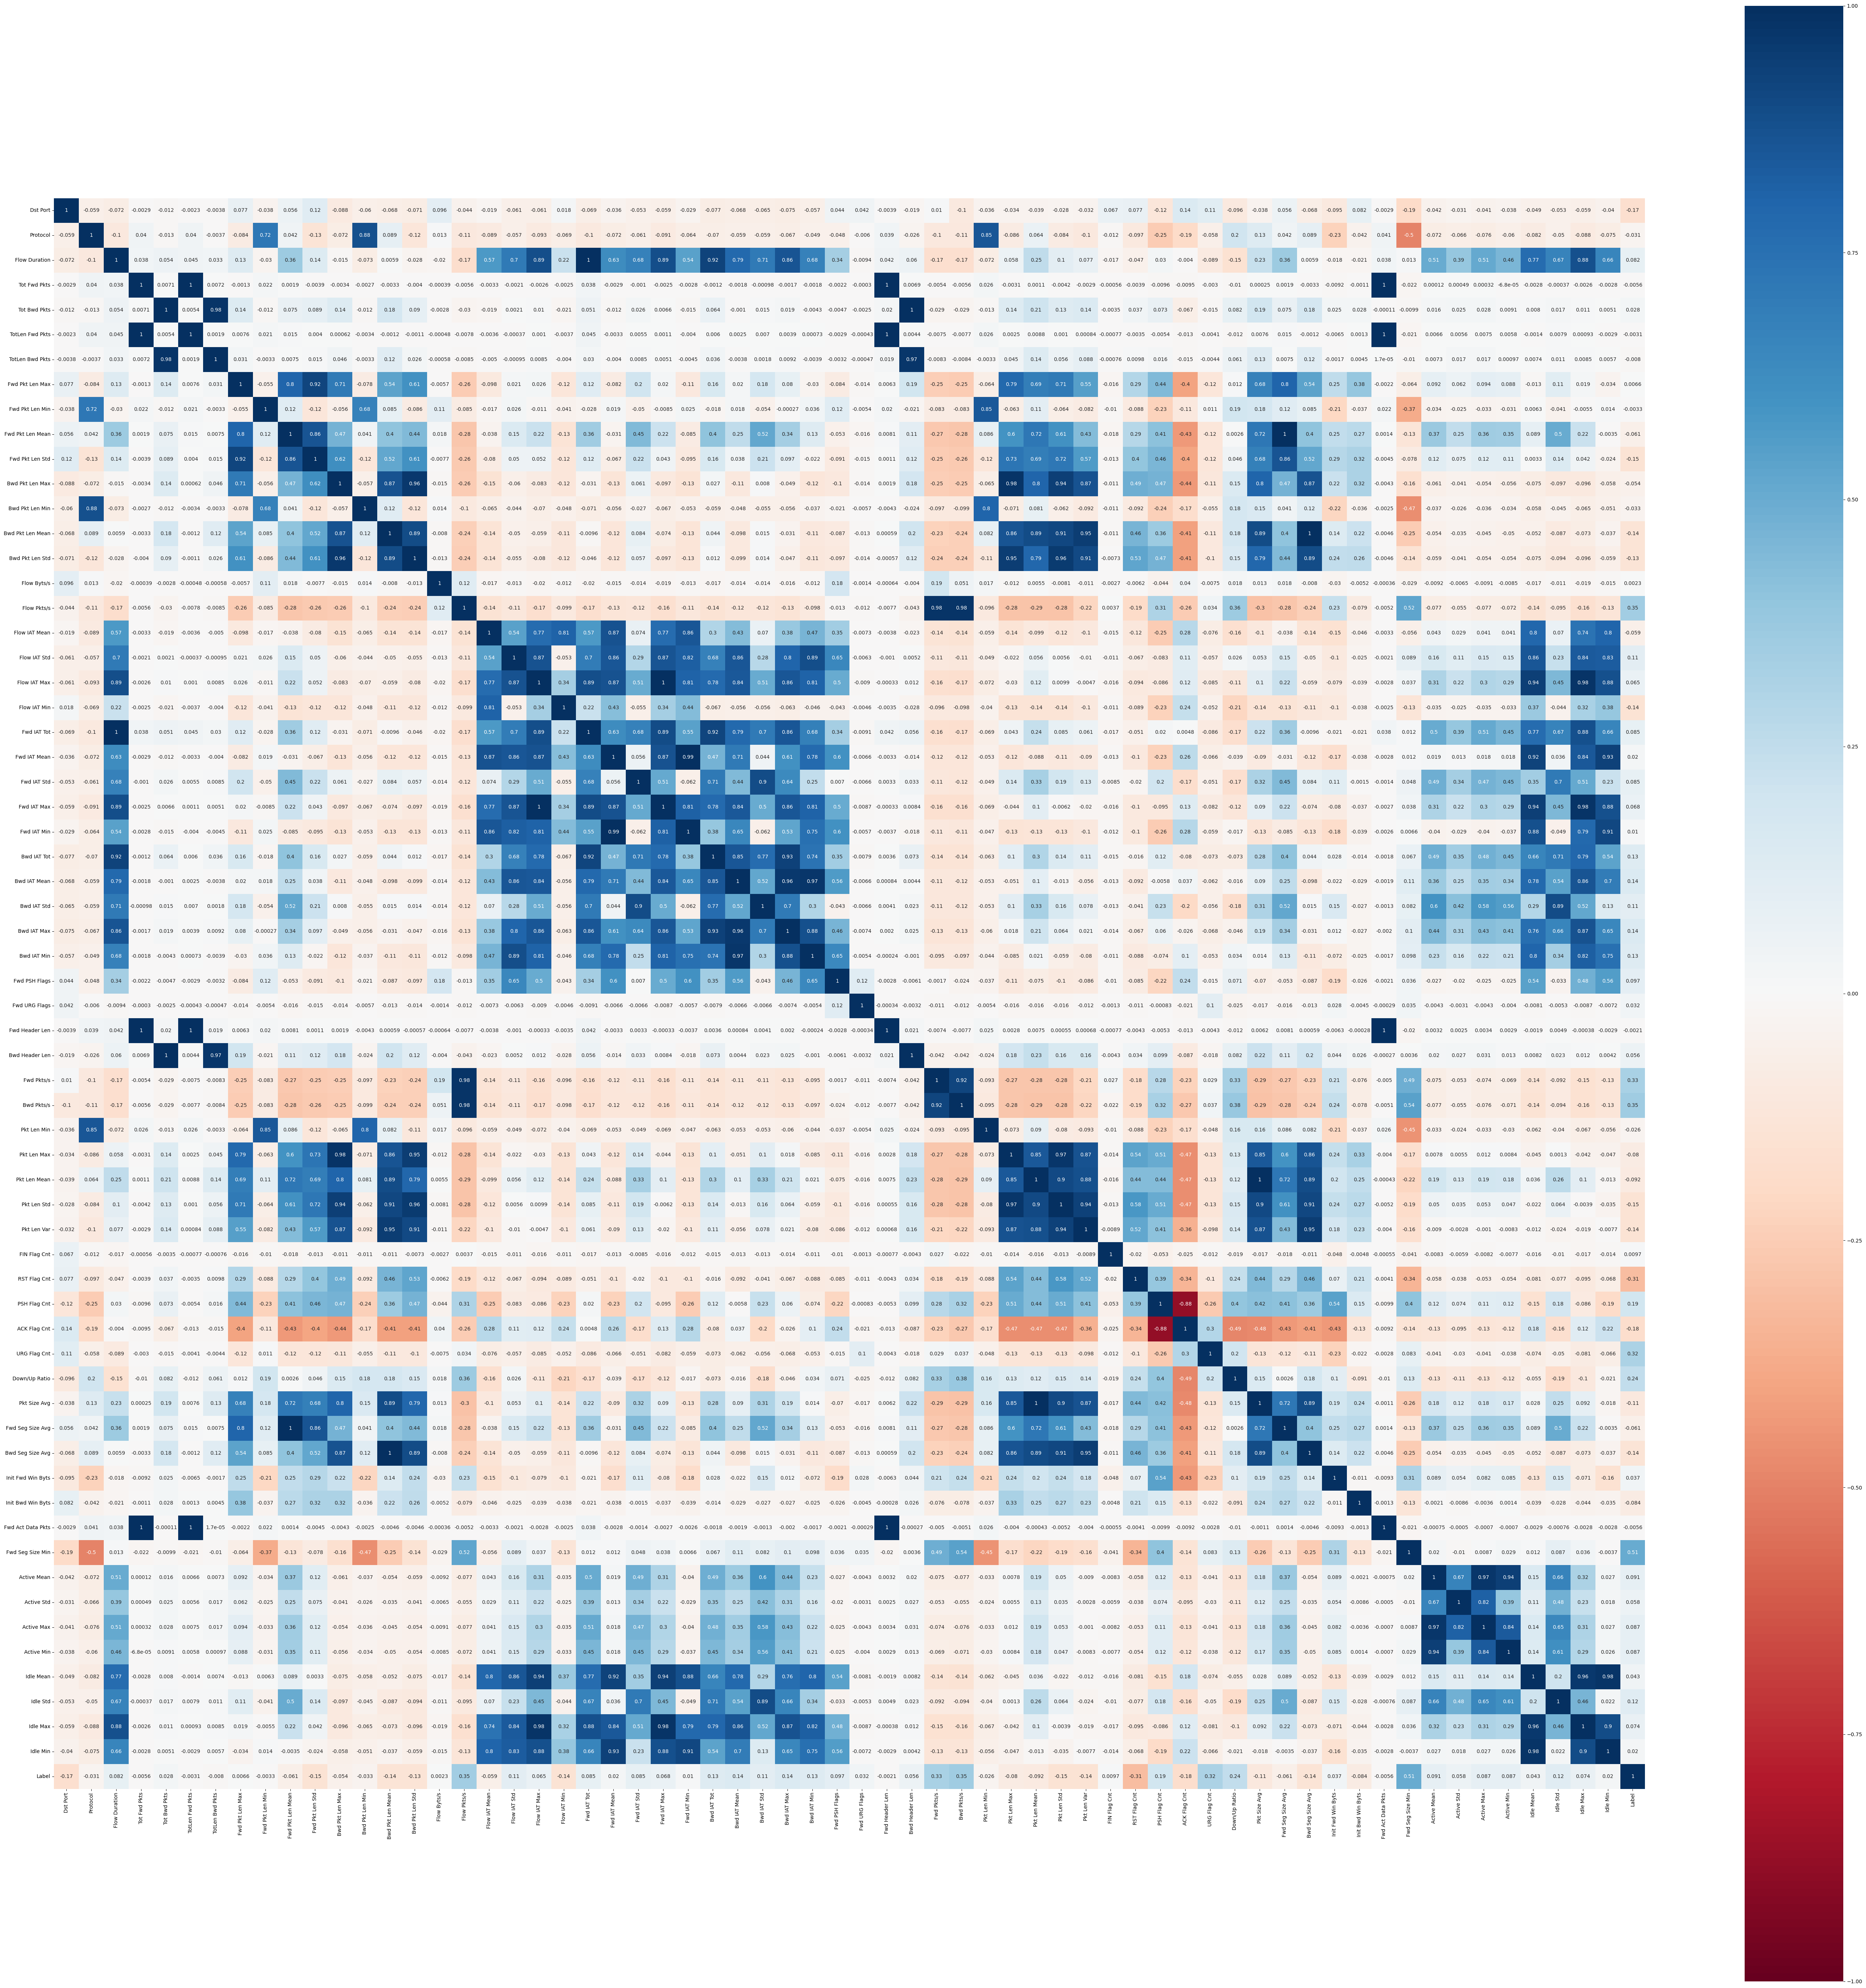

In [27]:
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

### b) Drop Columns

In [28]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Fwd Pkt Len Mean', 'Flow Duration', 'Fwd Pkts/s', 'TotLen Fwd Pkts', 'Bwd Pkt Len Max', 'Fwd IAT Min', 'Idle Mean', 'Pkt Len Max', 'Fwd Pkt Len Max', 'Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Max', 'Pkt Len Mean', 'Tot Bwd Pkts', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd Pkt Len Mean', 'Fwd IAT Tot', 'Bwd IAT Tot', 'TotLen Bwd Pkts', 'Active Mean', 'Fwd IAT Max', 'Tot Fwd Pkts', 'Fwd Header Len', 'Bwd Pkt Len Std', 'Pkt Len Var'}
26


In [29]:
network_data.drop(correlated_col, axis=1, inplace=True)
print (network_data.shape)

(115500, 38)


## 12. Check final Dataset

In [30]:
network_data

,Dst Port,Protocol,Fwd Pkt Len Min,Fwd Pkt Len Std,Bwd Pkt Len Min,Flow Byts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Min,Fwd IAT Std,...,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Std,Idle Max,Idle Min,Label
0,443,6,0,23.197906,46,2.336263,1.396461e+07,2.578900e+07,22,2.875936e+07,...,127,3,20,30373.771786,206637,163682,4.067040e+06,58549010,52797347,0
1,80,6,0,48.500000,0,60.224085,7.780466e+05,2.031246e+06,38,3.557089e+04,...,141,1,20,0.000000,0,0,0.000000e+00,0,0,0
2,80,6,0,0.000000,0,0.000000,9.200000e+01,0.000000e+00,92,0.000000e+00,...,-1,0,20,0.000000,0,0,0.000000e+00,0,0,0
3,2111,6,0,0.000000,0,0.000000,8.617436e+07,0.000000e+00,86174361,0.000000e+00,...,-1,0,20,0.000000,0,0,0.000000e+00,86174361,86174361,0
4,443,6,0,42.723920,126,6.628966,1.206825e+07,2.675886e+07,29581,3.448696e+07,...,8118,1,20,0.000000,77775,77775,0.000000e+00,59935597,59935597,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118153,22,6,0,0.000000,0,0.000000,7.000000e+00,0.000000e+00,7,0.000000e+00,...,230,0,32,0.000000,0,0,0.000000e+00,0,0,10
118154,22,6,0,0.000000,0,0.000000,6.000000e+00,0.000000e+00,6,0.000000e+00,...,230,0,32,0.000000,0,0,0.000000e+00,0,0,10
118155,22,6,0,133.958678,0,11587.716466,8.808178e+03,1.996388e+04,7,2.550206e+04,...,230,16,32,0.000000,0,0,0.000000e+00,0,0,10
118156,22,6,0,0.000000,0,0.000000,7.000000e+00,0.000000e+00,7,0.000000e+00,...,230,0,32,0.000000,0,0,0.000000e+00,0,0,10


<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b>Data Saving</b></h1>

In [31]:
network_data.to_csv('/kaggle/working/cic-ids.csv', index=False)